In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [21]:
data_raw = pd.read_csv('./../dataset_2/creditcard.csv')

In [22]:
data_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [24]:
data_raw.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [25]:
data_raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [26]:
data = data_raw.sample(frac=0.1)

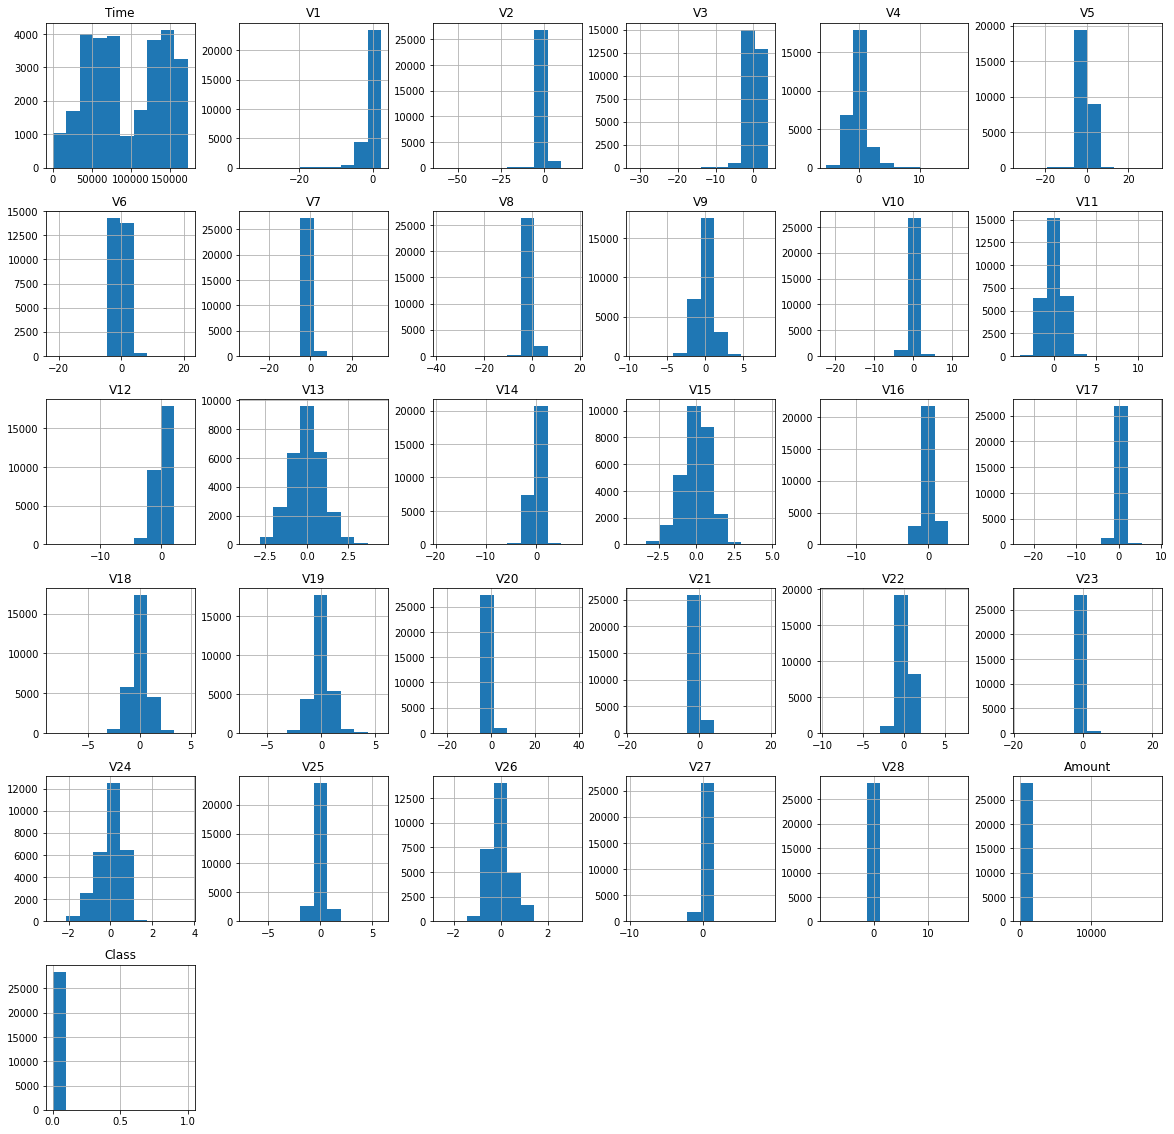

In [27]:
data.hist(figsize=(20,20))
plt.show()

In [34]:
fraud = data[data['Class']==1]['Class'].count()
valid = data[data['Class']==0]['Class'].count()
proporsi_fraud = fraud/valid
print(f'jumlah fraud = {fraud}')
print(f'jumlah valid = {valid}')
print(f'proporsi fraud = {proporsi_fraud}')


jumlah fraud = 41
jumlah valid = 28440
proporsi fraud = 0.0014416315049226441


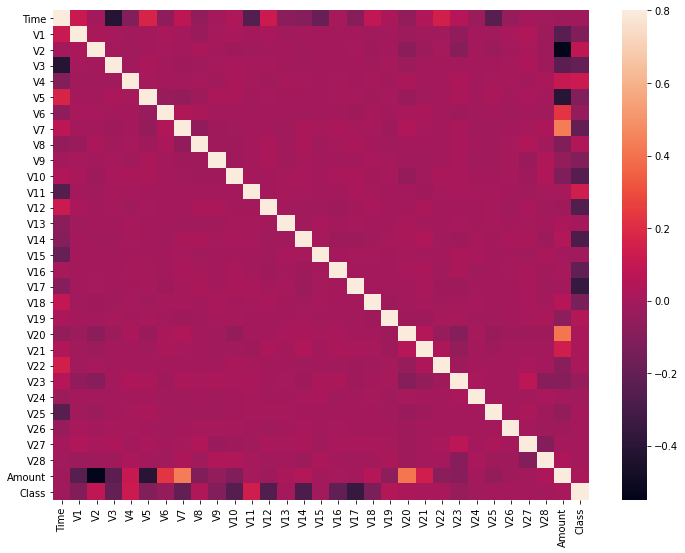

In [37]:
corrmat = data.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat, vmax=0.8)
plt.show()

In [40]:
columns = data.columns.tolist()
columns = [c for c in columns if c != 'Class']
target = 'Class'
X = data[columns]
Y = data[target]
print(x.shape)
print(y.shape)


(28481, 30)
(28481,)


In [41]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

classifier ={
    'Isolation Forest':IsolationForest(
                        max_samples= len(X),
                        contamination=proporsi_fraud,
                        random_state=1
                        ),
    'Local Outlier Factor': LocalOutlierFactor(
                        n_neighbors=20,
                        contamination=proporsi_fraud
                        )
}

In [43]:
n_outliers = fraud

for i ,(clf_name, clf) in enumerate(classifier.items()):
    if clf_name =='Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    print(f'{clf_name}:{n_errors}')
    print(f'accuracy_score : {accuracy_score(Y,y_pred)}')
    print(classification_report(Y,y_pred))

Isolation Forest:57
accuracy_score : 0.9979986657771848
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28440
           1       0.31      0.32      0.31        41

    accuracy                           1.00     28481
   macro avg       0.65      0.66      0.66     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor:83
accuracy_score : 0.9970857764825674
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28440
           1       0.00      0.00      0.00        41

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



In [44]:
fraud = data_raw[data_raw['Class']==1]['Class'].count()
valid = data_raw[data_raw['Class']==0]['Class'].count()
proporsi_fraud = fraud/valid
print(f'jumlah fraud = {fraud}')
print(f'jumlah valid = {valid}')
print(f'proporsi fraud = {proporsi_fraud}')

jumlah fraud = 492
jumlah valid = 284315
proporsi fraud = 0.0017304750013189597


In [243]:
fraud_data = data_raw[data_raw['Class']==1]
valid_data = data_raw[data_raw['Class']==0]
valid_data = valid_data.sample(frac= 4*proporsi_fraud)

In [244]:
valid_data.shape

(1968, 31)

In [245]:
fraud_valid_data = pd.concat([fraud_data,valid_data])

In [246]:
fraud_valid_data.shape

(2460, 31)

In [247]:
fraud_valid_data = shuffle(fraud_valid_data)

In [248]:
columns = fraud_valid_data.columns.tolist()
columns = [c for c in columns if c != 'Class']
target = 'Class'
X = fraud_valid_data[columns]
Y = fraud_valid_data[target]
print(X.shape)
print(Y.shape)

(2460, 30)
(2460,)


In [56]:
classifier ={
    'Isolation Forest':IsolationForest(
                        max_samples= len(X),
                        contamination=1/3,
                        random_state=1
                        ),
    'Local Outlier Factor': LocalOutlierFactor(
                        n_neighbors=20,
                        contamination=1/3
                        )
}

In [57]:
for i ,(clf_name, clf) in enumerate(classifier.items()):
    if clf_name =='Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    print(f'{clf_name}:{n_errors}')
    print(f'accuracy_score : {accuracy_score(Y,y_pred)}')
    print(classification_report(Y,y_pred))

Isolation Forest:286
accuracy_score : 0.8546747967479674
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1476
           1       0.66      0.88      0.75       492

    accuracy                           0.85      1968
   macro avg       0.81      0.86      0.82      1968
weighted avg       0.88      0.85      0.86      1968

Local Outlier Factor:834
accuracy_score : 0.5762195121951219
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1476
           1       0.24      0.32      0.27       492

    accuracy                           0.58      1968
   macro avg       0.49      0.49      0.49      1968
weighted avg       0.62      0.58      0.59      1968



In [174]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [100]:
model_forest = RandomForestClassifier().fit(X,Y)
model_tree = DecisionTreeClassifier().fit(X,Y)

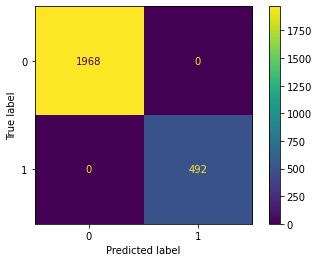

In [101]:
plot_confusion_matrix(model_tree,X,Y)

In [249]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [250]:
y_train[y_train==1].count()

396

In [251]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_test

array([[5.40802149e-01, 8.79164051e-01, 4.85303783e-01, ...,
        5.96551659e-01, 3.59059957e-01, 2.97662087e-03],
       [5.86438264e-01, 1.25639347e-01, 9.25865280e-01, ...,
        2.18110065e-01, 3.07701400e-01, 6.86912509e-04],
       [3.49585495e-01, 9.17794294e-01, 4.52455109e-01, ...,
        6.85828079e-01, 3.39807529e-01, 8.97806700e-04],
       ...,
       [6.35681039e-01, 9.26927831e-01, 4.57427554e-01, ...,
        7.05243304e-01, 3.44599083e-01, 5.11870330e-03],
       [3.14416219e-01, 8.36867841e-01, 4.19455539e-01, ...,
        6.59244761e-01, 3.00572299e-01, 3.61532899e-03],
       [3.97120461e-01, 9.04599934e-01, 4.49347548e-01, ...,
        6.62768946e-01, 3.34170387e-01, 3.19354061e-02]])

In [252]:
model_forest = RandomForestClassifier().fit(x_train,y_train)
model_tree = DecisionTreeClassifier().fit(x_train,y_train)
model_svm = svm.SVC().fit(x_train,y_train)

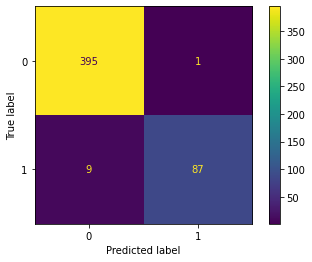

In [253]:
plot_confusion_matrix(model_forest,x_test,y_test)

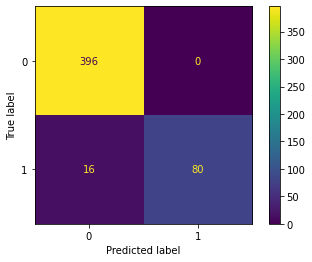

In [254]:
plot_confusion_matrix(model_svm,x_test,y_test)

In [255]:
columns = data_raw.columns.tolist()
columns = [c for c in columns if c != 'Class']
target = 'Class'
X = data_raw[columns]
Y = data_raw[target]
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [256]:
x_test = scaler.transform(X)

In [257]:
y_test = Y

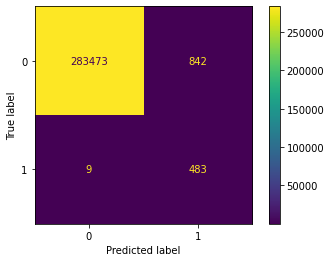

In [258]:
plot_confusion_matrix(model_forest,x_test,y_test)

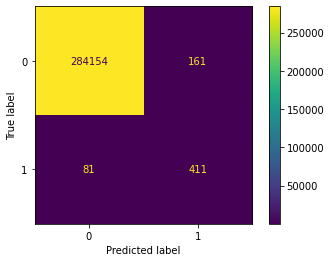

In [259]:
plot_confusion_matrix(model_svm,x_test,y_test)

In [162]:
pred_forest = model_forest.predict(x_test)
accuracy_score(y_test, pred_forest)

0.9876547978104471